This notebook implements the paper titled:

*An iterative approach for shadow removal in document images.*

We start by importing required packages and loading images. The loaded image is determined by `filename`. Some suggested values are also provided to work with other images from `./dataset/document`.

<font color="blue">The definitions of the functions we implemented and used below can be found [here](helper_functions.py) under appropriate section.</font>

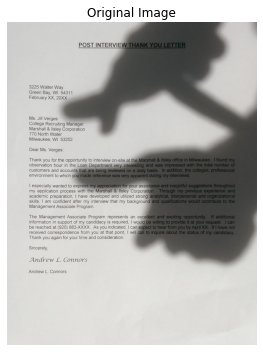

In [1]:
# Imports packages and prepares for execution (PreRUN)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import color,filters,transform
from scipy import ndimage as ndi
from helper_functions import *
from tqdm import tqdm


base_img_rpath = '../dataset/document/'  #dataset-read path
base_img_wpath = '../output/document/'   #output-write path
filename = 'document.png'  #choices = 'document.png', 'color_mosaic.jpg', 'textbook.jpg', 'manuscript.jpg'
ip_img = load_img(base_img_rpath + filename)


is_0_255 = True   #modifies algo if pixel values are 0-255 (False > color_mosaic), arg passed to functions.
f, ax = plot_img(ip_img, "Original Image")

The input image is first binarized using `skimage.filters`. The output is plotted below.

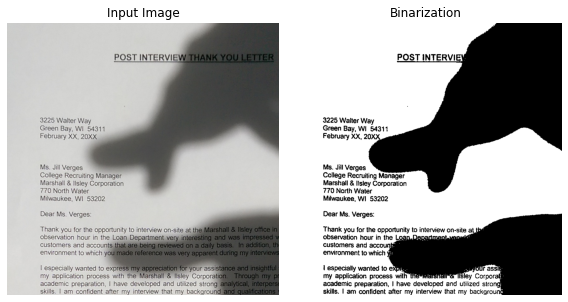

In [2]:
ip_img_gray = color.rgb2gray(ip_img)
threshold_mask = filters.threshold_local(ip_img_gray, block_size=2001)
binary_img = ip_img_gray > threshold_mask
f,ax = show_img_compare(ip_img, binary_img, "Input Image", "Binarization",900,900,img_2_binary=True)

The next step involves estimating the reflectance and shading components of the input image. While reflectance captures intricate details in the image, the shading component accounts for illumination and lighting conditions.


We set the number of iterations `n_iter=2` and `window_size=15` which is found to yield satisfactory results.

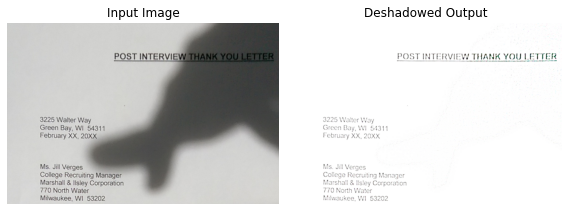

In [3]:
window_size = 15
n_iter = 2
iter_img = ip_img
iter_binary_img = binary_img
for iter in range(n_iter):
    iter_img, iter_binary_img = estimate_shading_reflectance(iter_img, iter_binary_img, window_size)
f,ax = show_img_compare(ip_img,iter_img, "Input Image", "Deshadowed Output",600,900)